# Battle of Neighborhoods in Toronto to open a Tutorial Point

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Scraping table data from the Wikipedia page</a>

2. <a href="#item2">Fetching the latitudes and longtitudes coordinates</a>

3. <a href="#item3">Exploratory analysis on Downtown Toronto neighborhoods with Foursquare API</a>
    
</font>
</div>

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [208]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


# 1. Scraping table data from the Wikipedia page

In [209]:
!pip install beautifulsoup4
!pip install lxml
!pip install html5lib

In [210]:
from bs4 import BeautifulSoup # web scraping library for Python

In [211]:
# Assigning the link we are going to scrape data from as website_url
wiki_url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
data_inp=requests.get(wiki_url).text
soup = BeautifulSoup(data_inp, 'lxml') # Use Beautuful Soup to extract HTML

#All the table content (the data that we want to scrape) is under the class "wikitable stable". So let's find the class 'wikitable sortable' in the HTML script.
table = soup.find('table', {'class': 'wikitable sortable'}).tbody

In [212]:
#the tr tags represent the rows, whereas the th tags are the header of each column.

rows = table.find_all('tr')

# taking out the sapces in between 
columns = ['PostalCode', 'Borough', 'Neighborhood']
#[v.text.replace('\n','') for v in rows[0].find_all('th')]
print(columns)

['PostalCode', 'Borough', 'Neighborhood']


In [213]:
# prepareing the dataframe and assinging the columns 
df = pd.DataFrame(columns=columns)
df

,PostalCode,Borough,Neighborhood


In [214]:
# going to each row and taking out the \n 
for i in range(1, len(rows)):
    tds = rows[i].find_all('td')
    
    if len(tds) == 3:
        values = [tds[0].text.replace('\n',''), tds[1].text.replace('\n',''), tds[2].text.replace('\n','')]
    else:
        values = [td.text.replace('\n','') for td in tds]

    # populating the dataframe with the data that we just extarcted from the HTML table
    df = df.append(pd.Series(values, index=columns), ignore_index=True)

    # save + name the file to the capstone folder
    df.to_csv('Toronto_Neighborhoods.csv',index=False)

In [215]:
# read the table to the dataframe to_data and take a look at the first 5 rows of the table
to_data = pd.read_csv("Toronto_Neighborhoods.csv") 
to_data.dtypes

PostalCode      object
Borough         object
Neighborhood    object
dtype: object

In [216]:
to_data.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [217]:
#Removing the cells where boroughs are not assigned
to_data = to_data[to_data.Borough != 'Not assigned']
to_data.head()

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [218]:
#Combining the neighborhoods that have the same postal code

to_data = to_data.groupby(['PostalCode','Borough'])['Neighborhood'].apply(lambda x: ', '.join(x)).reset_index()
to_data

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [219]:
#Removing the cells where boroughs are not York
to_data1 = to_data[to_data.Borough == 'York'] 
to_data2 = to_data[to_data.Borough =='North York']
to_data3 = to_data[to_data.Borough =='East York']
Bo_data = pd.concat([to_data1, to_data2, to_data3], axis=0)
Bo_data

,PostalCode,Borough,Neighborhood
73,M6C,York,Humewood-Cedarvale
74,M6E,York,Caledonia-Fairbanks
80,M6M,York,"Del Ray, Mount Dennis, Keelsdale and Silverthorn"
81,M6N,York,"Runnymede, The Junction North"
98,M9N,York,Weston
17,M2H,North York,Hillcrest Village
18,M2J,North York,"Fairview, Henry Farm, Oriole"
19,M2K,North York,Bayview Village
20,M2L,North York,"York Mills, Silver Hills"
21,M2M,North York,"Willowdale, Newtonbrook"


In [220]:
Bo_data.shape

(34, 3)

## 2.Fetching the latitudes and longtitudes coordinates

In [221]:
#Imoprting the csv file that contains the latitudes and longitudes of each postal code area

geocoder = pd.read_csv("Geospatial_Coordinates.csv") 

# make sure that both tables have the same column name for postal code 
# because we are combining the tables together on the postal code column
geocoder.rename(columns={'Postal Code':'PostalCode'}, inplace=True)

geocoder.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [222]:
#Looks like the postal code order matches with to_data, now let's combine these two dataframes together

to_geo = pd.merge(Bo_data, geocoder, on='PostalCode')
to_geo

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M6C,York,Humewood-Cedarvale,43.693781,-79.428191
1,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512
2,M6M,York,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013
3,M6N,York,"Runnymede, The Junction North",43.673185,-79.487262
4,M9N,York,Weston,43.706876,-79.518188
5,M2H,North York,Hillcrest Village,43.803762,-79.363452
6,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
7,M2K,North York,Bayview Village,43.786947,-79.385975
8,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714
9,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493


In [223]:
#Fetching the latitude and longtitude of Toronto

address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


In [224]:
#Now we have everything to create a map of different boroughs and neighborhoods in Toronto

# create map of Toronto using latitude and longitude values
map_to = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(to_geo['Latitude'], to_geo['Longitude'], to_geo['Borough'], to_geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_to)  
    
map_to

## 3.Exploratory analysis on York, North York, East York Toronto neighborhoods with Foursquare API

In [225]:
#Fetch the latitude and longtitude for Downtown Toronto, as well as creating a map for the neighborhoods
address = 'York, ON'

geolocator = Nominatim(user_agent="dt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of york are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of york are 44.0007518, -79.4372217.


In [226]:

# create map of Downtown Toronto using latitude and longitude values
map_dt = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(to_geo['Latitude'], to_geo['Longitude'], to_geo['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_dt)  
    
map_dt

In [227]:
##Define Foursquare credentials and version

CLIENT_ID = 'L0JH4UGPWXXDRDBOICH2KERGPEZZPW3MXK02U2ZSQQHUWLJT' # your Foursquare ID
CLIENT_SECRET = 'JQZ3OBXHANGXSRCJSEZAECYBHIHZAN554PS0EK4UT35I4QWA' # your Foursquare Secret
VERSION = '20200518' # Foursquare API version

In [228]:
#test analysis on the neighborhood 'Harbourfront East, Union Station, Toronto Islands'
to_geo.loc[11, 'Neighborhood']

'York Mills West'

In [229]:
to_geo_latitude = to_geo.loc[11, 'Latitude'] # neighborhood latitude value
to_geo_longitude = to_geo.loc[11, 'Longitude'] # neighborhood longitude value

to_geo_name = to_geo.loc[9, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(to_geo_name, 
                                                               to_geo_latitude, 
                                                               to_geo_longitude))

Latitude and longitude values of Willowdale, Newtonbrook are 43.752758299999996, -79.4000493.


In [230]:
#Limiting the number of venues to 100 and radius of search to 500

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    to_geo_latitude, 
    to_geo_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=L0JH4UGPWXXDRDBOICH2KERGPEZZPW3MXK02U2ZSQQHUWLJT&client_secret=JQZ3OBXHANGXSRCJSEZAECYBHIHZAN554PS0EK4UT35I4QWA&v=20200518&ll=43.752758299999996,-79.4000493&radius=500&limit=100'

In [231]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eeb94be29ce6a001b2000ef'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'St. Andrew - Windfields',
  'headerFullLocation': 'St. Andrew - Windfields, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 43.7572583045, 'lng': -79.39383109183271},
   'sw': {'lat': 43.748258295499994, 'lng': -79.4062675081673}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd2111477b29c7455e88d82',
       'name': 'Kitchen Food Fair',
       'location': {'address': '33 The Links Rd.',
        'crossStreet': 'at Tournament Dr.',
        'lat': 43.751297901387304,
   

In [232]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [233]:

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Kitchen Food Fair,Convenience Store,43.751298,-79.401393
1,Tournament Park,Park,43.751257,-79.399717


In [234]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape))


(2, 4) venues were returned by Foursquare.


In [235]:
#Here is a function that repeat the same process for all the neighborhoods in Downtown Toronto

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [236]:
dt_venues = getNearbyVenues(names = to_geo['Neighborhood'],
                                   latitudes = to_geo['Latitude'],
                                   longitudes = to_geo['Longitude']
                                  )

Humewood-Cedarvale
Caledonia-Fairbanks
Del Ray, Mount Dennis, Keelsdale and Silverthorn
Runnymede, The Junction North
Weston
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Bedford Park, Lawrence Manor East
Lawrence Manor, Lawrence Heights
Glencairn
North Park, Maple Leaf Park, Upwood Park
Humber Summit
Humberlea, Emery
Parkview Hill, Woodbine Gardens
Woodbine Heights
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)


In [237]:
print(dt_venues.shape)
dt_venues.head()

(328, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Humewood-Cedarvale,43.693781,-79.428191,Cedarvale Park,43.692535,-79.428705,Field
1,Humewood-Cedarvale,43.693781,-79.428191,Cedarvale Ravine,43.690188,-79.426106,Trail
2,Humewood-Cedarvale,43.693781,-79.428191,Phil White Arena,43.691303,-79.431761,Hockey Arena
3,Humewood-Cedarvale,43.693781,-79.428191,Pigeon Trodden Lawns,43.695418,-79.422929,Park
4,Caledonia-Fairbanks,43.689026,-79.453512,Nairn Park,43.690654,-79.456300,Park


In [238]:
#Now let's see how many venues there are for each neighborhood

dt_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Bathurst Manor, Wilson Heights, Downsview North",19,19,19,19,19,19
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",22,22,22,22,22,22
Caledonia-Fairbanks,4,4,4,4,4,4
"Del Ray, Mount Dennis, Keelsdale and Silverthorn",4,4,4,4,4,4
Don Mills,25,25,25,25,25,25
Downsview,16,16,16,16,16,16
"East Toronto, Broadview North (Old East York)",4,4,4,4,4,4
"Fairview, Henry Farm, Oriole",66,66,66,66,66,66


In [239]:
print('There are {} uniques categories.'.format(len(dt_venues['Venue Category'].unique())))

There are 119 uniques categories.


In [240]:
#Using one hot encoding to get the different venuw categories

# one hot encoding
dt_onehot = pd.get_dummies(dt_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dt_onehot['Neighborhoods'] = dt_venues['Neighborhood'] 
# using 'Neighborhoods' instead of 'Neighborhood' to avoid confusions with the original neighborhood column in the dataframe 

# move neighborhood column to the first column
fixed_columns = [dt_onehot.columns[-1]] + list(dt_onehot.columns[:-1])
dt_onehot = dt_onehot[fixed_columns]

dt_onehot.head()

,Neighborhoods,Accessories Store,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Store,Bike Shop,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Field,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Liquor Store,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Skating Rink,Smoothie Shop,Snack Place,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Women's Store,Yoga Studio
0,Humewood-Cedarvale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Humewood-Cedarvale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Humewood-Cedarvale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Humewood-Cedarvale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Caledonia-Fairbanks,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [241]:
dt_onehot.shape


(328, 120)

In [308]:
#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

dt_grouped = dt_onehot.groupby('Neighborhoods').mean().reset_index()
dt_grouped.head()

,Neighborhoods,Accessories Store,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Store,Bike Shop,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Field,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Liquor Store,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Skating Rink,Smoothie Shop,Snack Place,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Women's Store,Yoga Studio
0,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.105263,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.105263,0.000000,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.052632,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.052632,0.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,0.0,0.0,0.052632,0.052632,0.0,0.00,0.0,0.000000,0.0,0.052632,0.0,0.052632,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
1,Bayview Village,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,0.0,0.25,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.25,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
2,"Bedford Park, Lawrence Manor East",0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.045455,0.045455,0.0,0.00,0.0,0.090909,0.045455,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.045455,0.045455,0.0,0.0,0.0,0.0,0.000000,0.045455,0.0,0.0,0.090909,0.00,0.0,0.045455,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.045455,0.045455,0.0,0.00,0.0,0.045455,0.0,0.090909,0.0,0.090909,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.045455,0.0,0.045455,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
3,Caledonia-Fairbanks,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00

In [243]:
dt_grouped.shape

(28, 120)

In [244]:
#Let's print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in dt_grouped['Neighborhoods']:
    print("----"+hood+"----")
    temp = dt_grouped[dt_grouped['Neighborhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bathurst Manor, Wilson Heights, Downsview North----
              venue  freq
0       Coffee Shop  0.11
1              Bank  0.11
2       Bridal Shop  0.05
3  Sushi Restaurant  0.05
4          Pharmacy  0.05


----Bayview Village----
                 venue  freq
0  Japanese Restaurant  0.25
1   Chinese Restaurant  0.25
2                 Café  0.25
3                 Bank  0.25
4    Accessories Store  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0          Restaurant  0.09
1  Italian Restaurant  0.09
2         Coffee Shop  0.09
3      Sandwich Place  0.09
4             Butcher  0.05


----Caledonia-Fairbanks----
               venue  freq
0               Park  0.50
1      Women's Store  0.25
2               Pool  0.25
3  Accessories Store  0.00
4      Luggage Store  0.00


----Del Ray, Mount Dennis, Keelsdale and Silverthorn----
                venue  freq
0      Sandwich Place  0.25
1  Turkish Restaurant  0.25
2                 Bar  0.25
3      Discou

In [245]:
#put that into a pandas dataframe

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [246]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = dt_grouped['Neighborhoods']

for ind in np.arange(dt_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dt_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Pharmacy,Supermarket,Fried Chicken Joint,Pizza Place,Deli / Bodega,Restaurant,Sandwich Place,Bridal Shop
1,Bayview Village,Chinese Restaurant,Café,Bank,Japanese Restaurant,Yoga Studio,Electronics Store,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store
2,"Bedford Park, Lawrence Manor East",Sandwich Place,Italian Restaurant,Coffee Shop,Restaurant,Greek Restaurant,Grocery Store,Indian Restaurant,Juice Bar,Liquor Store,Comfort Food Restaurant
3,Caledonia-Fairbanks,Park,Women's Store,Pool,Yoga Studio,Dog Run,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega
4,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",Turkish Restaurant,Sandwich Place,Bar,Discount Store,Yoga Studio,Dog Run,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice


## 4. Clustering

Run k-means to cluster the neighborhood into 5 clusters.

In [247]:
# set number of clusters
kclusters = 5

dt_grouped_clustering = dt_grouped.drop('Neighborhoods', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dt_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 3, 0, 0, 3, 1, 0, 3, 0, 4, 2, 3, 0, 0, 3, 0, 0, 3, 0, 0,
       0, 1, 0, 0, 3, 1], dtype=int32)

In [248]:
#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

dt_merged = to_geo

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dt_merged = dt_merged.join(neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhood')

#neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop(columns = ['Cluster Labels'])

#neighborhoods_venues_sorted.head() 

dt_merged = dt_merged.dropna()

#dt_merged# check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,3.0,Park,Hockey Arena,Trail,Field,Yoga Studio,Department Store,Discount Store,Diner,Dim Sum Restaurant,Dessert Shop
1,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512,3.0,Park,Women's Store,Pool,Yoga Studio,Dog Run,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega
2,M6M,York,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013,0.0,Turkish Restaurant,Sandwich Place,Bar,Discount Store,Yoga Studio,Dog Run,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice
3,M6N,York,"Runnymede, The Junction North",43.673185,-79.487262,0.0,Grocery Store,Convenience Store,Breakfast Spot,Pizza Place,Yoga Studio,Dog Run,Construction & Landscaping,Cosmetics Shop,Curling Ice,Deli / Bodega
4,M9N,York,Weston,43.706876,-79.518188,1.0,Convenience Store,Park,Yoga Studio,Golf Course,Construction & Landscaping,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store,Dessert Shop
5,M2H,North York,Hillcrest Village,43.803762,-79.363452,0.0,Golf Course,Dog Run,Pool,Mediterranean Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store
6,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,0.0,Clothing Store,Coffee Shop,Fast Food Restaurant,Restaurant,Japanese Restaurant,Cosmetics Shop,Convenience Store,Tea Room,Electronics Store,Bank
7,M2K,North York,Bayview Village,43.786947,-79.385975,0.0,Chinese Restaurant,Café,Bank,Japanese Restaurant,Yoga Studio,Electronics Store,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store
10,M2N,North York,"Willowdale, Willowdale East",43.770120,-79.408493,0.0,Ramen Restaurant,Restaurant,Sandwich Place,Pizza Place,Coffee Shop,Café,Sushi Restaurant,Shopping Mall,Steakhouse,Bubble Tea Shop
11,M2P,North York,York Mills West,43.752758,-79.400049,1.0,Convenience Store,Park,Yoga Studio,Golf Course,Construction & Landscaping,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store,Dessert Shop


In [249]:
dt_merged['Cluster Labels'] = dt_merged['Cluster Labels'].astype('int')

In [310]:
dt_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,3,Park,Hockey Arena,Trail,Field,Yoga Studio,Department Store,Discount Store,Diner,Dim Sum Restaurant,Dessert Shop
1,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512,3,Park,Women's Store,Pool,Yoga Studio,Dog Run,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega
2,M6M,York,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013,0,Turkish Restaurant,Sandwich Place,Bar,Discount Store,Yoga Studio,Dog Run,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice
3,M6N,York,"Runnymede, The Junction North",43.673185,-79.487262,0,Grocery Store,Convenience Store,Breakfast Spot,Pizza Place,Yoga Studio,Dog Run,Construction & Landscaping,Cosmetics Shop,Curling Ice,Deli / Bodega
4,M9N,York,Weston,43.706876,-79.518188,1,Convenience Store,Park,Yoga Studio,Golf Course,Construction & Landscaping,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store,Dessert Shop


In [251]:
#visualize the resulting clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dt_merged['Latitude'], dt_merged['Longitude'], dt_merged['Neighborhood'], dt_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 1 - Grocery & Restaurant

In [252]:
dt_merged.loc[dt_merged['Cluster Labels'] == 0, dt_merged.columns[[2] + list(range(5, dt_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",0,Turkish Restaurant,Sandwich Place,Bar,Discount Store,Yoga Studio,Dog Run,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice
3,"Runnymede, The Junction North",0,Grocery Store,Convenience Store,Breakfast Spot,Pizza Place,Yoga Studio,Dog Run,Construction & Landscaping,Cosmetics Shop,Curling Ice,Deli / Bodega
5,Hillcrest Village,0,Golf Course,Dog Run,Pool,Mediterranean Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store
6,"Fairview, Henry Farm, Oriole",0,Clothing Store,Coffee Shop,Fast Food Restaurant,Restaurant,Japanese Restaurant,Cosmetics Shop,Convenience Store,Tea Room,Electronics Store,Bank
7,Bayview Village,0,Chinese Restaurant,Café,Bank,Japanese Restaurant,Yoga Studio,Electronics Store,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store
10,"Willowdale, Willowdale East",0,Ramen Restaurant,Restaurant,Sandwich Place,Pizza Place,Coffee Shop,Café,Sushi Restaurant,Shopping Mall,Steakhouse,Bubble Tea Shop
12,"Willowdale, Willowdale West",0,Coffee Shop,Bank,Discount Store,Pizza Place,Pharmacy,Grocery Store,Fried Chicken Joint,Gas Station,Comfort Food Restaurant,Construction & Landscaping
14,Don Mills,0,Restaurant,Coffee Shop,Japanese Restaurant,Asian Restaurant,Gym,Beer Store,Caribbean Restaurant,Dim Sum Restaurant,Italian Restaurant,Discount Store
15,Don Mills,0,Restaurant,Coffee Shop,Japanese Restaurant,Asian Restaurant,Gym,Beer Store,Caribbean Restaurant,Dim Sum Restaurant,Italian Restaurant,Discount Store
16,"Bathurst Manor, Wilson Heights, Downsview North",0,Coffee Shop,Bank,Pharmacy,Supermarket,Fried Chicken Joint,Pizza Place,Deli / Bodega,Restaurant,Sandwich Place,Bridal Shop


### Cluster 2 - Parks & Entertainment

In [253]:
dt_merged.loc[dt_merged['Cluster Labels'] == 1, dt_merged.columns[[2] + list(range(5, dt_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Weston,1,Convenience Store,Park,Yoga Studio,Golf Course,Construction & Landscaping,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store,Dessert Shop
11,York Mills West,1,Convenience Store,Park,Yoga Studio,Golf Course,Construction & Landscaping,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store,Dessert Shop
33,"East Toronto, Broadview North (Old East York)",1,Park,Convenience Store,Metro Station,Yoga Studio,Gift Shop,Construction & Landscaping,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store


### Cluster 3: Sports & Fitness

In [254]:
dt_merged.loc[dt_merged['Cluster Labels'] == 2, dt_merged.columns[[2] + list(range(5, dt_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,"Humberlea, Emery",2,Baseball Field,Yoga Studio,Electronics Store,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store,Dessert Shop


### Cluster 4: Park

In [255]:
dt_merged.loc[dt_merged['Cluster Labels'] == 3, dt_merged.columns[[2] + list(range(5, dt_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Humewood-Cedarvale,3,Park,Hockey Arena,Trail,Field,Yoga Studio,Department Store,Discount Store,Diner,Dim Sum Restaurant,Dessert Shop
1,Caledonia-Fairbanks,3,Park,Women's Store,Pool,Yoga Studio,Dog Run,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega
13,Parkwoods,3,Construction & Landscaping,Park,Food & Drink Shop,Yoga Studio,Dog Run,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store
18,Downsview,3,Grocery Store,Park,Gym / Fitness Center,Shopping Mall,Snack Place,Construction & Landscaping,Hotel,Baseball Field,Bank,Liquor Store
19,Downsview,3,Grocery Store,Park,Gym / Fitness Center,Shopping Mall,Snack Place,Construction & Landscaping,Hotel,Baseball Field,Bank,Liquor Store
20,Downsview,3,Grocery Store,Park,Gym / Fitness Center,Shopping Mall,Snack Place,Construction & Landscaping,Hotel,Baseball Field,Bank,Liquor Store
21,Downsview,3,Grocery Store,Park,Gym / Fitness Center,Shopping Mall,Snack Place,Construction & Landscaping,Hotel,Baseball Field,Bank,Liquor Store
25,Glencairn,3,Park,Pub,Sushi Restaurant,Japanese Restaurant,Yoga Studio,Distribution Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice
26,"North Park, Maple Leaf Park, Upwood Park",3,Construction & Landscaping,Park,Bakery,Basketball Court,Electronics Store,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store
30,Woodbine Heights,3,Pharmacy,Curling Ice,Park,Beer Store,Athletics & Sports,Bus Stop,Video Store,Skating Rink,Cosmetics Shop,Convenience Store


### Cluster 5: Pizza & Shopping

In [256]:
dt_merged.loc[dt_merged['Cluster Labels'] == 4, dt_merged.columns[[2] + list(range(5, dt_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Humber Summit,4,Pizza Place,Construction & Landscaping,Golf Course,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store,Dessert Shop


## Importing & cleaning school data

In [257]:
df_school = pd.read_csv('School locations-all types data.csv')

In [258]:
df_school.shape

(1289, 27)

In [259]:
for col in df_school.columns: 
    print(col)

GEO_ID
NAME
SCHOOL_LEVEL
SCHOOL_TYPE
BOARD_NAME
SOURCE_ADDRESS
SCHOOL_TYPE_DESC
ADDRESS_POINT_ID
ADDRESS_NUMBER
LINEAR_NAME_FULL
ADDRESS_FULL
POSTAL_CODE
MUNICIPALITY
CITY
PLACE_NAME
GENERAL_USE_CODE
CENTRELINE_ID
LO_NUM
LO_NUM_SUF
HI_NUM
HI_NUM_SUF
LINEAR_NAME_ID
X
Y
LATITUDE
LONGITUDE
geometry


In [260]:
df_school = df_school.loc[:,('NAME','SCHOOL_TYPE_DESC','MUNICIPALITY','LATITUDE','LONGITUDE','POSTAL_CODE')]
#df_school.shape
#df_school.head()
df_school.dtypes


NAME                 object
SCHOOL_TYPE_DESC     object
MUNICIPALITY         object
LATITUDE            float64
LONGITUDE           float64
POSTAL_CODE          object
dtype: object

In [263]:
#Removing the cells where boroughs are not York
df_school = df_school[df_school.SCHOOL_TYPE_DESC == 'English Public'] 
to_sch1 = df_school[df_school.MUNICIPALITY == 'York'] 
to_sch2 = df_school[df_school.MUNICIPALITY =='North York']
to_sch3 = df_school[df_school.MUNICIPALITY =='East York']
Y_sch = pd.concat([to_sch1, to_sch2, to_sch3], axis=0)
Y_sch.to_csv('School_locations_york.csv')
Y_sch.shape

(206, 6)

In [343]:
Y_sch.shape
to_geo
to_geo.rename(columns={"Latitude": "LATITUDE", "Longitude": "LONGITUDE", "PostalCode": "POSTAL_CODE"})


,POSTAL_CODE,Borough,Neighborhood,LATITUDE,LONGITUDE
0,M6C,York,Humewood-Cedarvale,43.693781,-79.428191
1,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512
2,M6M,York,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013
3,M6N,York,"Runnymede, The Junction North",43.673185,-79.487262
4,M9N,York,Weston,43.706876,-79.518188
5,M2H,North York,Hillcrest Village,43.803762,-79.363452
6,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
7,M2K,North York,Bayview Village,43.786947,-79.385975
8,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714
9,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493


In [269]:
df_york = pd.read_csv('School_locations_york_1.csv')
df_york.head()

,NAME,SCHOOL_TYPE_DESC,MUNICIPALITY,LATITUDE,LONGITUDE,POSTAL_CODE
0,Bala Avenue Community School,English Public,York,43.689471,-79.499016,M6M
1,C R Marchant Middle School,English Public,York,43.701730,-79.512937,M9N
2,Cedarvale Community School,English Public,York,43.696139,-79.430331,M6C
3,Charles E Webster Jr Public School,English Public,York,43.693443,-79.475103,M6M
4,Cordella Jr Public School,English Public,York,43.679070,-79.487585,M6N


In [347]:
df_york.POSTAL_CODE.count()
df_grp = df_york.groupby('POSTAL_CODE').count()
df_grp = df_grp.drop(['SCHOOL_TYPE_DESC','MUNICIPALITY','LATITUDE','LONGITUDE'], axis=1)
df_grp=df_grp.rename(columns={"NAME" : "Count"})
df_grp.head()

,Count
POSTAL_CODE,
M2H,9
M2J,16
M2K,5
M2L,3
M2M,8


In [332]:
df_york_grp=pd.read_csv('numsc_york.csv')
df_york_grp.rename(columns={"NAME" : "COUNT"})
df_york_grp.head()

Text(0.5, 0, 'POSTAL_CODES')

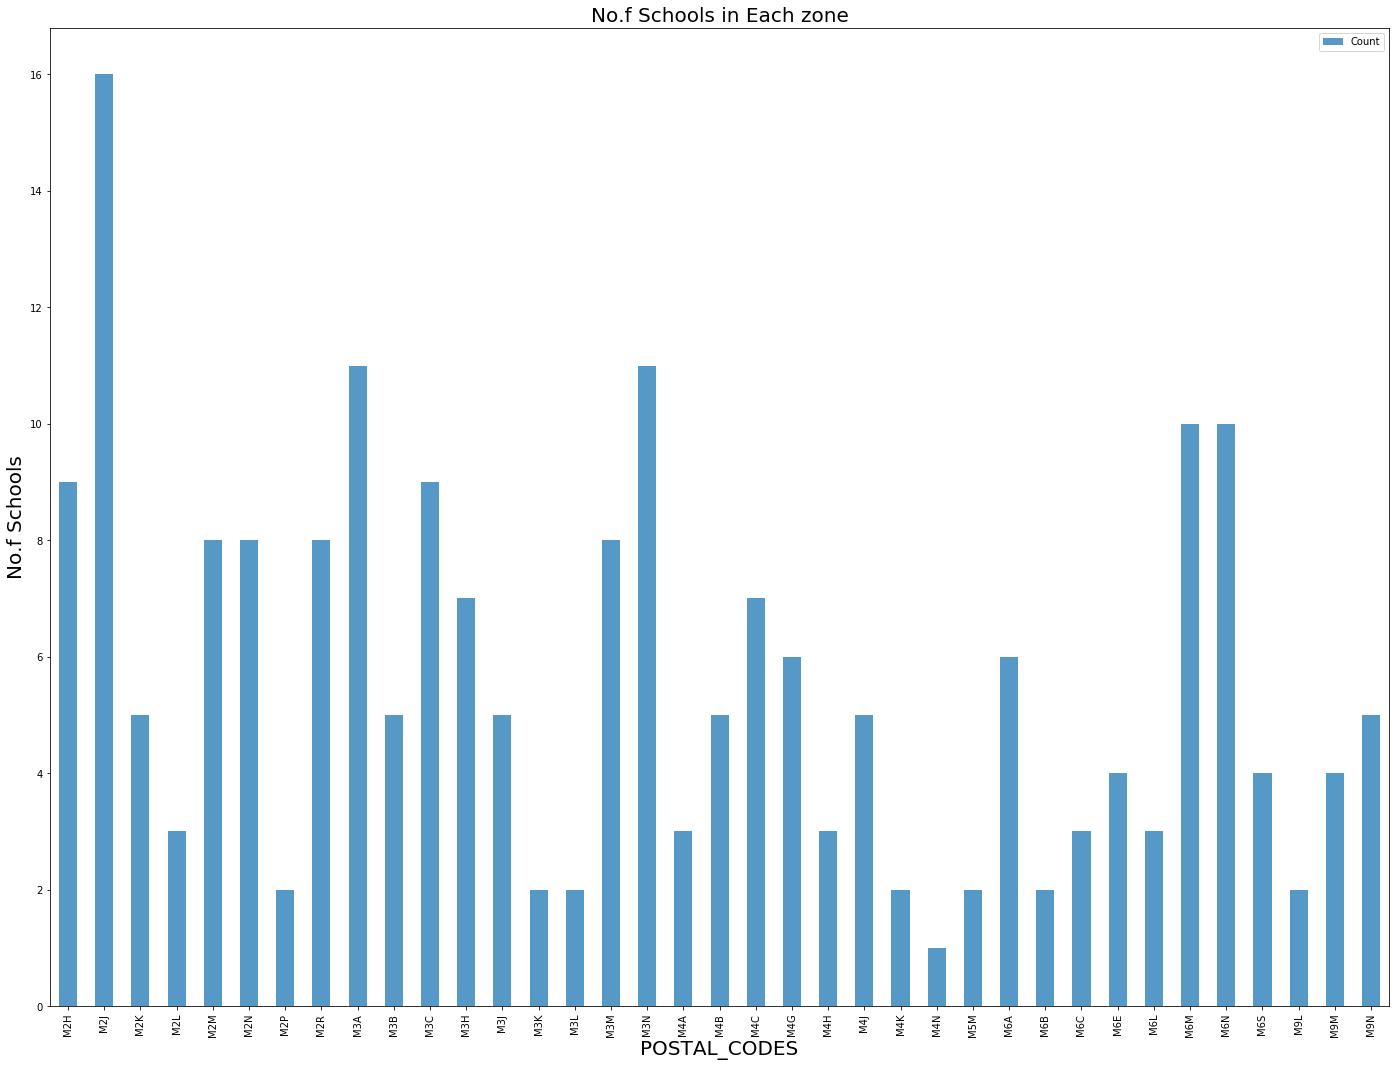

In [348]:
import matplotlib.pyplot as plt
df_grp.plot(kind='bar',figsize=(24,18),alpha=0.75)
plt.title("No.f Schools in Each zone", fontsize=20)
plt.ylabel("No.f Schools", fontsize=20)
plt.xlabel("POSTAL_CODES", fontsize=20)
#plt.xticks(df_york_grp['POSTAL_CODE'])